In [1]:
import pickle5 as p
import _pickle as cPickle
import bz2

In [2]:

def loadDictionaryFromPickleFile(dictionaryPath):
    ''' Load the pickle file as a dictionary
    Args:
        dictionaryPath: path to the pickle file
    Return: dictionary from the pickle file
    '''
    filePointer=open(dictionaryPath, 'rb')
    dictionary = p.load(filePointer)
    filePointer.close()
    return dictionary

In [3]:
# results = loadDictionaryFromPickleFile(r"/home/khatiwada/starmie/results/ugen_tuple_benchmark_top-100_results_by_starmie.pickle")
results = loadDictionaryFromPickleFile(r"/home/khatiwada/dust/diversity_algorithms/starmie_results/imdb_case_study_benchmark_top-21_results_by_starmie.pickle")

In [ ]:
total = 0
for query in results:
    print(query, len(results[query]))
    

In [ ]:
total / len(results)

In [ ]:
results

In [7]:
# This function saves dictionaries as pickle files in the storage.
def saveDictionaryAsPickleFile(dictionary, dictionaryPath):
    if dictionaryPath.rsplit(".")[-1] == "pickle":
        filePointer=open(dictionaryPath, 'wb')
        p.dump(dictionary,filePointer, protocol=p.HIGHEST_PROTOCOL)
        filePointer.close()
    else: #pbz2 format
        with bz2.BZ2File(dictionaryPath, "w") as f: 
            cPickle.dump(dictionary, f)

In [10]:
saveDictionaryAsPickleFile(results, r"/home/khatiwada/dust/groundtruth/imdb_case_study_union_groundtruth.pickle")

In [1]:
# starmie generating the unioned table.

In [9]:
import pandas as pd
import os

# Define the folder containing the tables
folder_path = "/home/khatiwada/starmie/data/imdb_case_study/datalake"  # Update with your folder path

# Define the list of tables in order
union_order = results['query_table.csv']

# Read and concatenate the tables
unioned_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in union_order], ignore_index=True)

# Save the final unioned table
unioned_df.to_csv(os.path.join(folder_path, "imdb_case_study_starmie_unioned_table.csv"), index=False)

In [ ]:
generating dust unioned table in proper format

In [ ]:
import csv
import re

# Input and output file paths
input_file = "/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table.txt"  # Change this to your actual file path
output_file = "/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table_formatted.csv"

# Define the list of headers in the specified order
headers = ["Title", "Duration", "MPA", "Rating", "grossWorldWide", "directors", "writers", "stars", "genres", "countries_origin", "filming_locations", "Languages", "release_date"]

# Read the file
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Parse the data
data = []
current_entry = {}

for line in lines:
    line = line.strip()
    if not line:
        continue
    
    # Split by [SEP] and remove [CLS]
    parts = re.split(r" \[SEP] ", line.replace("[CLS] ", ""))
    
    for part in parts:
        key_value = part.split("  ", 1)  # Split on double spaces
        if len(key_value) == 2:
            key, value = key_value
            current_entry[key] = value
    
    if current_entry:
        data.append(current_entry)
        current_entry = {}

# Write to CSV
with open(output_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=headers)
    writer.writeheader()
    writer.writerows(data)

print(f"CSV file saved as {output_file}")


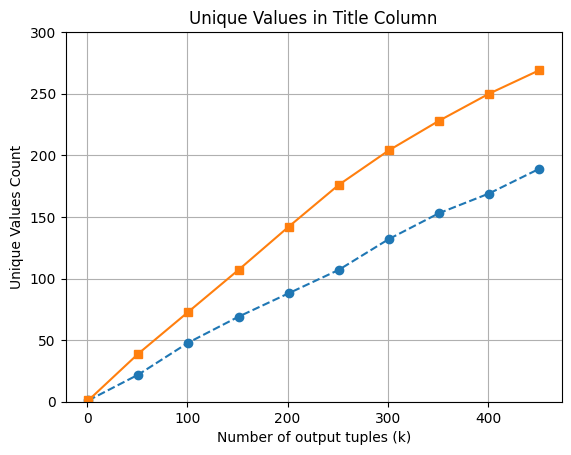

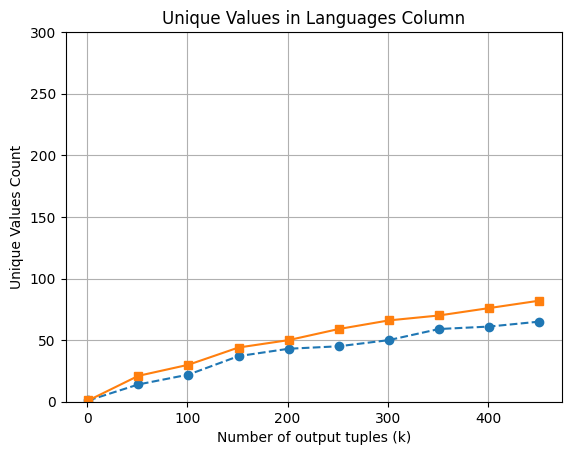

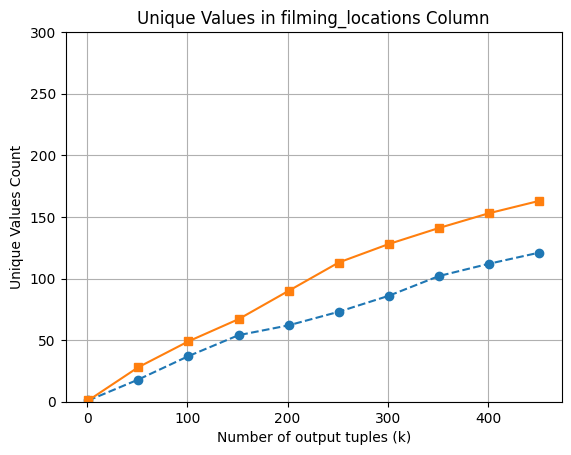

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Function to count unique values dynamically and plot

# Function to count unique values dynamically and plot with steps for two CSV files
def plot_unique_counts(csv_file1, csv_file2, max_n_rows, skip_rows1, skip_rows2, step):
    df1 = pd.read_csv(csv_file1, skiprows=range(1, skip_rows1+1))
    df2 = pd.read_csv(csv_file2, skiprows=range(1, skip_rows2+1))
    selected_columns = ["Title", "Languages", "filming_locations"]
    for column in selected_columns:
        unique_counts1 = []
        unique_counts2 = []
        x_values = list(range(1, max_n_rows + 1, step))
        
        for n in x_values:
            unique_counts1.append(df1.iloc[:n][column].nunique())
            unique_counts2.append(df2.iloc[:n][column].nunique())
        
        plt.figure()
        plt.plot(x_values, unique_counts1, marker='o', linestyle='--', label='Starmie')
        plt.plot(x_values, unique_counts2, marker='s', linestyle='-', label='DUST')
        plt.xlabel("Number of output tuples (k)")
        plt.ylabel("Unique Values Count")
        plt.ylim(0, 300)  # Set Y-axis limit from 0 to 500
        plt.title(f"Unique Values in {column} Column")
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
        # plt.legend()
        plt.grid()
        plt.show()

# Example usage
csv_input_file1 = "/home/khatiwada/dust/diversity_algorithms/starmie_results/imdb_case_study_starmie_unioned_table.csv"  # Change this to your actual CSV file
max_n_rows = 500  # Change this to the desired number of rows to consider
skip_rows1 = 0
csv_input_file2 = "/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table_formatted.csv"  # Change this to your actual CSV file
skip_rows2 = 0  # Change this to the number of initial rows to skip
step = 50  # Change this to the step size for plotting
plot_unique_counts(csv_input_file1, csv_input_file2, max_n_rows, skip_rows1, skip_rows2, step)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Function to count unique values dynamically and plot

# Function to count unique values dynamically and plot with steps for two CSV files
def plot_unique_counts(csv_file1, csv_file2, max_n_rows, skip_rows1, skip_rows2, step):
    df1 = pd.read_csv(csv_file1, skiprows=range(1, skip_rows1+1))
    df2 = pd.read_csv(csv_file2, skiprows=range(1, skip_rows2+1))
    selected_columns = ["Title", "Languages", "filming_locations"]
    line_styles = {"Title": "-", "Languages": "--", "filming_locations": ":"}
    colors = {"Starmie": "blue", "DUST": "red"}
    markers = {"Starmie": "o", "DUST": "s"}
    
    plt.figure(figsize=(10, 6))
    for column in selected_columns:
        unique_counts1 = []
        unique_counts2 = []
        x_values = list(range(1, max_n_rows + 1, step))
        
        for n in x_values:
            unique_counts1.append(df1.iloc[:n][column].nunique())
            unique_counts2.append(df2.iloc[:n][column].nunique())
        
        plt.plot(x_values, unique_counts1, marker=markers["Starmie"], linestyle=line_styles[column], color=colors["Starmie"], label=f'Starmie - {column}')
        plt.plot(x_values, unique_counts2, marker=markers["DUST"], linestyle=line_styles[column], color=colors["DUST"], label=f'DUST - {column}')
    
   
    plt.xlabel("Number of output tuples (k)")
    plt.ylabel("Unique Values Count")
    plt.ylim(0, 300)  # Set Y-axis limit from 0 to 500
    plt.title(f"Unique Values in {column} Column")
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
csv_input_file1 = "/home/khatiwada/dust/diversity_algorithms/starmie_results/imdb_case_study_starmie_unioned_table.csv"  # Change this to your actual CSV file
max_n_rows = 500  # Change this to the desired number of rows to consider
skip_rows1 = 0
csv_input_file2 = "/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table_formatted.csv"  # Change this to your actual CSV file
skip_rows2 = 0  # Change this to the number of initial rows to skip
step = 50  # Change this to the step size for plotting
plot_unique_counts(csv_input_file1, csv_input_file2, max_n_rows, skip_rows1, skip_rows2, step)



In [ ]:
import pandas as pd

# Example DataFrames
df1 = pd.read_csv(r"/home/khatiwada/dust/data/imdb_case_study/query/query_table.csv")
df2 = pd.read_csv(r"/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table_formatted.csv")
df2 = pd.read_csv(r"/home/khatiwada/dust/diversity_algorithms/starmie_results/imdb_case_study_starmie_unioned_table.csv")
overlapping_rows = df1.merge(df2, how='inner').drop_duplicates()

# Count number of overlapping rows
num_overlapping = len(overlapping_rows)

print("Number of overlapping rows:", num_overlapping)
print(overlapping_rows)

In [ ]:
df1.nunique()

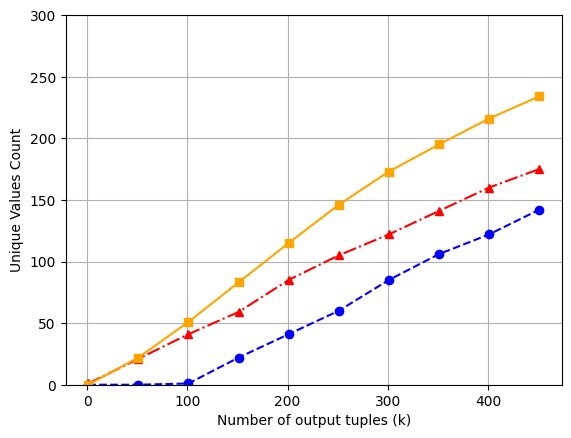

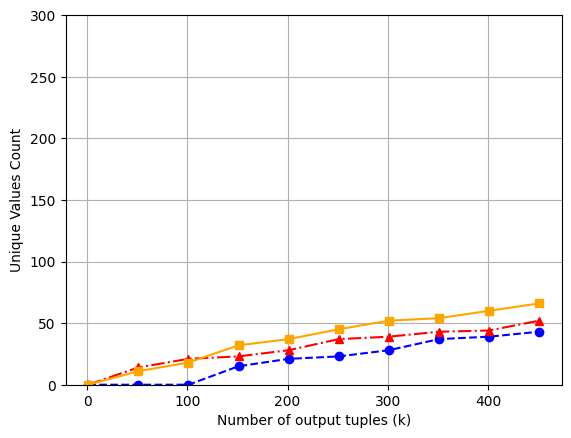

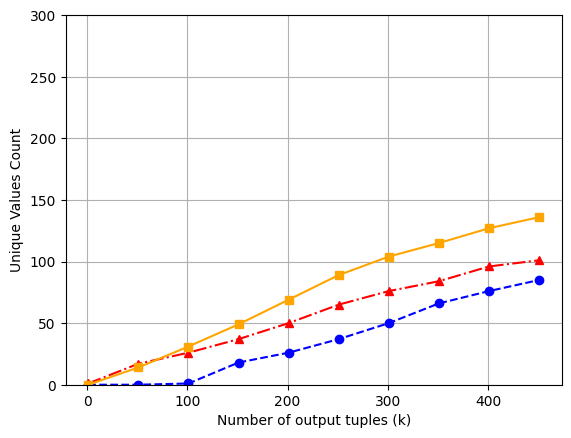

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count unique values dynamically and plot with steps for two CSV files
def plot_unique_counts(csv_file1, csv_file2, query_csv, max_n_rows, skip_rows1, skip_rows2, step):
    df1 = pd.read_csv(csv_file1, skiprows=range(1, skip_rows1+1))
    df2 = pd.read_csv(csv_file2, skiprows=range(1, skip_rows2+1))
    df1_d = pd.read_csv(csv_file1, skiprows=range(1, 99))  # Starmie-D omitting first 98 rows
    df_query = pd.read_csv(query_csv)
    
    selected_columns = ["Title", "Languages", "filming_locations"]
    
    for column in selected_columns:
        unique_counts1 = []
        unique_counts2 = []
        unique_counts1_d = []
        x_values = list(range(1, max_n_rows + 1, step))
        query_values = set(df_query[column].dropna().unique())
        
        for n in x_values:
            unique_values1 = set(df1.iloc[:n][column].dropna().unique()) - query_values
            unique_values2 = set(df2.iloc[:n][column].dropna().unique()) - query_values
            unique_values1_d = set(df1_d.iloc[:n][column].dropna().unique()) - query_values
            unique_counts1.append(len(unique_values1))
            unique_counts2.append(len(unique_values2))
            unique_counts1_d.append(len(unique_values1_d))
        
        plt.figure()
        plt.plot(x_values, unique_counts1, marker='o', color="blue", linestyle='--', label='Starmie')
        plt.plot(x_values, unique_counts1_d, marker='^', color="red", linestyle='-.', label='Starmie-D')
        plt.plot(x_values, unique_counts2, marker='s', color="orange", linestyle='-', label='DUST')
        plt.xlabel("Number of output tuples (k)")
        plt.ylabel("Unique Values Count")
        plt.ylim(0, 300)  # Set Y-axis limit from 0 to 300
        # plt.title(f"Unique Values in {column} Column")
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)
        plt.grid()
        plt.show()

# Example usage
csv_input_file1 = "/home/khatiwada/dust/diversity_algorithms/starmie_results/imdb_case_study_starmie_unioned_table.csv"  # Change this to your actual CSV file
csv_input_file2 = "/home/khatiwada/dust/diversity_algorithms/div_result_tables/imdb_case_study/cosine/dust/our/query_table_formatted.csv"  # Change this to your actual CSV file
query_csv = "/home/khatiwada/dust/data/imdb_case_study/query/query_table.csv"  # Change this to your query table CSV file
max_n_rows = 500  # Change this to the desired number of rows to consider
skip_rows1 = 0
skip_rows2 = 0  # Change this to the number of initial rows to skip
step = 50  # Change this to the step size for plotting
plot_unique_counts(csv_input_file1, csv_input_file2, query_csv, max_n_rows, skip_rows1, skip_rows2, step)
